In [1]:
%load_ext google.cloud.bigquery
%matplotlib inline
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
%run silhouette_plotter.py
%run parse.py
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import pickle
cl = pickle.load(open( "pk/cl.p", "rb" ) )
clusters = pickle.load( open( "pk/clusters.p", "rb" ) )
categs = pickle.load( open( "pk/categs.p", "rb" ) )
categ = pickle.load(open( "pk/categ.p", "rb" ) )
colors = pickle.load(open( "pk/colors.p", "rb" ) )
tsne_results_3d = pickle.load(open( "pk/tsne_results_3d.p", "rb" ) )
df = pickle.load(open( "pk/df.p", "rb" ) )
dflabel = pickle.load(open( "pk/dflabel.p", "rb" ) )
labeled_addresses = pickle.load(open( "pk/labeled_addresses.p", "rb" ) )
cats = pickle.load(open( "pk/cats.p", "rb" ) )
not_subset = pickle.load(open( "pk/not_subset.p", "rb" ) )
labelmask = pickle.load(open( "pk/labelmask.p", "rb" ) )

In [3]:
#remove address (string) from analysis
data = df.iloc[:,1:]

In [4]:
log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
scale = StandardScaler()
num_features = data.shape[1]
pca =PCA(n_components=num_features)


#build pipeline
pipe = Pipeline([('log', log ),
                 ('scale', scale ),
                 ('PCA', pca)])

results = pipe.fit_transform(data)



In [5]:
c = cl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
df_summary = pd.DataFrame(centroids, columns = data.columns)

In [6]:
#put cluster sizes into summary dataframe
cluster_sizes = pd.Series(cl.labels_).value_counts()
df_summary['cluster_size'] = cluster_sizes

In [7]:
df_summary.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
df_summary

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
7,5.654559,7.581786,34.687310,6.376662,1.878441e+04,3376.220312,100.643297,13.668558,4.310588e+04,5781.884459,...,3.091681e+03,-1.040834e-17,8.326673e-17,2.494507e+06,3.472436e+06,2.906898e+06,3.676120e+06,10.566866,60.295403,2661
0,7.347926,8.969837,158.161654,22.145139,6.941805e+04,9638.295487,293.620775,33.582299,8.261263e+04,9392.625953,...,4.605196e+03,2.701640e-04,4.282336e-04,2.716489e+06,4.161121e+06,3.103477e+06,4.281959e+06,16.212944,103.792334,2566
19,7.915171,8.634954,473.835850,61.336929,2.551985e+05,32895.250388,816.682183,96.757907,3.765313e+05,44495.004658,...,2.749418e+04,8.463256e-04,8.463256e-04,1.770261e+06,2.657469e+06,1.881302e+06,2.574607e+06,11.906670,224.871524,2118
39,17.798371,23.545916,67.599490,4.055264,3.203967e+04,1818.541940,143.577680,6.390411,5.154622e+04,2208.827313,...,3.209007e+03,3.334597e-04,3.334597e-04,1.107190e+06,1.796628e+06,1.237822e+06,2.042176e+06,19.818915,63.492963,2079
31,5.585525,9.878800,6.837962,1.367741,2.961667e+03,541.599256,62.263068,6.706584,2.031721e+04,2101.221685,...,1.339477e+03,2.373124e-03,2.770298e-03,1.866860e+06,2.696938e+06,2.921402e+06,3.704672e+06,12.656614,55.457471,2048
37,10.884929,12.646403,151.638656,14.434088,9.041047e+04,8477.466752,249.553154,20.337921,1.387454e+05,11178.059966,...,1.186504e+04,3.540704e-04,5.612465e-04,1.057934e+06,1.599332e+06,8.584879e+05,1.222701e+06,9.497821,85.402859,1959
4,12.872105,296.848251,88.926910,7.376853,4.723449e+04,3766.823022,179.831524,0.711073,8.348956e+04,281.816230,...,5.954202e+03,2.115335e-03,2.272711e-03,1.039041e+05,8.145142e+04,1.412662e+06,1.818811e+06,11.306722,72.684057,1832
20,37.741125,38.050129,432.014432,11.750721,2.064267e+05,5496.120414,555.029927,14.947361,2.159065e+05,5707.324831,...,1.348155e+04,-1.526557e-16,-1.804112e-16,7.763555e+05,1.476698e+06,7.296841e+05,1.378616e+06,27.424676,91.996449,1790
3,7.637286,181.675374,11.260289,1.713056,5.744399e+03,773.754158,68.346247,0.468538,3.170934e+04,175.190387,...,2.548979e+03,1.461349e-03,1.746542e-03,1.512446e+05,1.093325e+05,1.665765e+06,1.783616e+06,8.548379,52.063250,1424
34,12.389653,13.226475,866.563494,71.945572,1.857476e+05,15317.757185,1357.251374,106.093850,7.093078e+04,5493.210477,...,2.895401e+03,4.430770e-03,7.970691e-03,1.971762e+06,3.561835e+06,2.713180e+06,4.527075e+06,19.809361,404.086682,1346


## Radar Plot

In [197]:
df_radar = df_summary#.loc[list(clusters)]

In [198]:
df_radar['label'] = df_radar.index

In [199]:
df_radar = df_radar.reset_index()

In [200]:
df_radar.set_index('label', inplace=True)

In [201]:
df_radar[df_radar<0] = 0

In [202]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [203]:
#log scale
df_radar = np.log1p(df_radar)+1

In [204]:
df_radar

,index,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
label,,,,,,,,,,,,,,,,,,,,,
7,3.079442,2.895302,3.149642,4.574795,2.998321,10.840836,9.124808,5.621470,3.685706,11.671438,...,9.036794,1.000000,1.000000,15.729602,1.872144,15.882597,1.817407,3.448145,5.115705,8.886833
0,1.000000,3.122013,3.299564,6.069920,4.141785,12.147917,10.173603,6.685689,4.543342,12.321930,...,9.435158,1.000270,1.000428,15.814851,1.928931,15.948034,1.866987,3.845662,5.651981,8.850493
19,3.995732,3.187754,3.265398,7.162969,5.132554,13.449801,11.401114,7.706474,5.582494,13.838759,...,11.221766,1.000846,1.000846,15.386638,1.916760,15.447475,1.862267,3.557744,6.419966,8.658700
39,4.688879,3.933770,4.200545,5.228285,2.620430,11.374761,8.506340,5.973817,3.000183,11.850254,...,9.074029,1.000333,1.000333,14.917336,1.964201,15.028865,1.974490,4.035862,5.166556,8.640123
31,4.465736,2.884874,3.386816,3.058979,1.861936,8.993845,7.296371,5.147302,3.042075,10.919273,...,8.200781,1.002370,1.002766,15.439769,1.893897,15.887574,1.818949,3.614224,5.033488,8.625107
37,4.637586,3.475271,3.613476,6.028073,3.736579,12.412126,10.045285,6.523671,4.060486,12.840403,...,10.381436,1.000354,1.000561,14.871829,1.920980,14.662929,1.885522,3.351168,5.459021,8.580700
4,2.609438,3.629880,6.696584,5.498997,3.125472,11.762901,9.234253,6.197566,1.537120,12.332489,...,9.692020,1.002113,1.002270,12.551234,1.578807,15.160987,1.827462,3.510146,5.299786,8.513709
20,4.044522,4.656902,4.664846,7.070771,3.545588,13.237706,9.611980,7.320822,3.769293,13.282605,...,10.509152,1.000000,1.000000,14.562367,2.065431,14.500368,2.061026,4.347258,5.532561,8.490529
3,2.386294,3.156088,6.207711,3.506365,1.998076,9.656155,7.652546,5.239112,1.384267,11.364398,...,8.843840,1.001460,1.001745,12.926661,1.544000,15.325795,1.727910,3.256371,4.971485,8.261927


In [205]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [206]:
ls = list(df_radar)[1:-1]

In [207]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [208]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}

In [209]:
d

{'outgoing_txns': 'A',
 'outgoing_avg_time_btwn_txns': 'B',
 'outgoing_std_time_btwn_txns': 'C',
 'total_usd_sent': 'D',
 'incoming_txns': 'E',
 'incoming_avg_time_btwn_txns': 'F',
 'incoming_std_time_btwn_txns': 'G',
 'total_usd_recd': 'H',
 'contracts_created': 'I',
 'contract_txns_sent': 'J',
 'eth_balance': 'K',
 'num_tokens_used': 'L'}

In [210]:
dfr = df_radar[feats]

In [211]:
#setting up color map
NUM_COLORS = cl.n_clusters
cmp = plt.get_cmap('viridis', 60)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


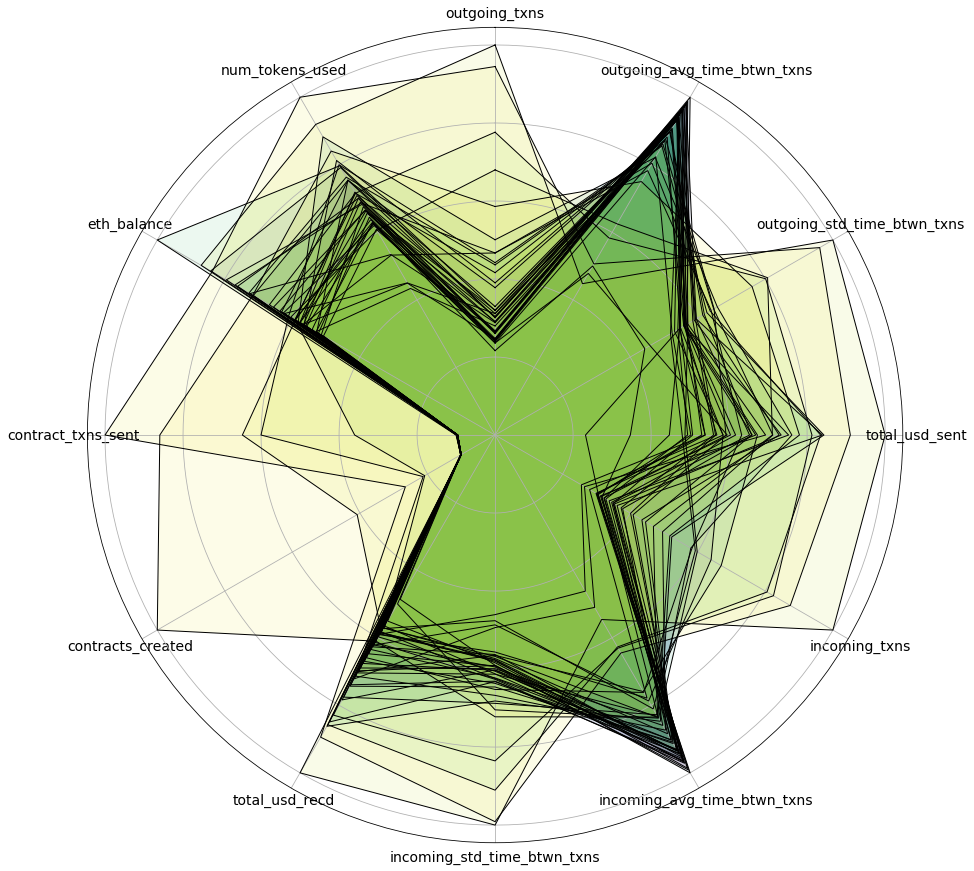

In [212]:
# Libraries
from math import pi

 
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(dfr)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_color_cycle([cmp(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(40):
    # Ind1
    lbl = df_radar.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='k', label=lbl)
    ax.fill(angles, values, alpha=0.1)
 
 
# # Add legend
# plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))

In [213]:
total_eth = {}
total_addresses = {}

for clust in range(cl.n_clusters):
    mask = cl.labels_==clust
    eth = np.sum(df[mask]['eth_balance'])
    size = np.sum(cl.labels_==clust)
    total_eth[clust] = eth
    total_addresses[clust] = size

In [214]:

names = np.array(list(total_eth.keys()))
values = np.array(list(total_eth.values()))
indices = np.argsort(values)

names = names[indices][::-1]
values = values[indices][::-1]

In [215]:
names
dfr=dfr.loc[names]

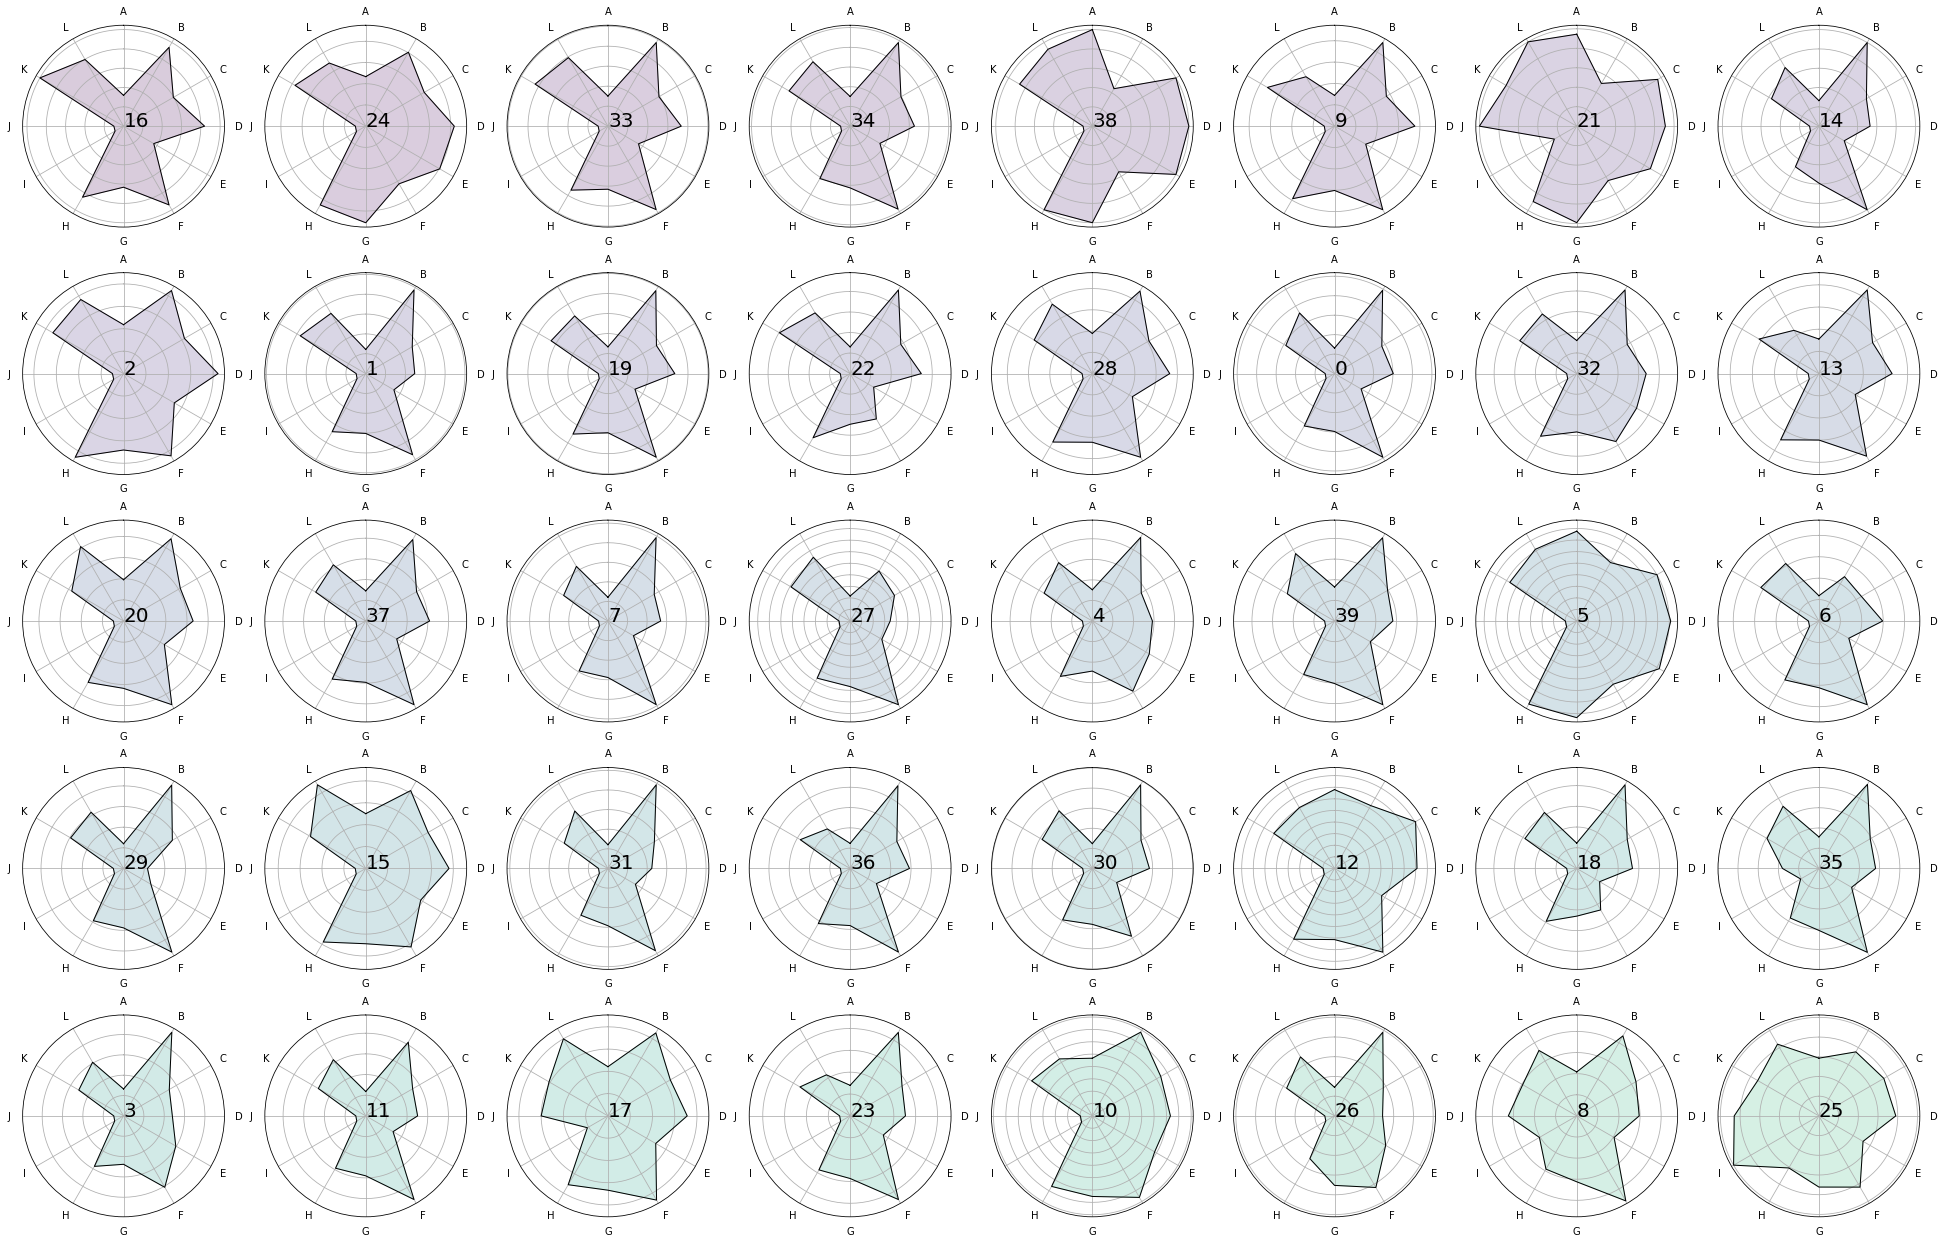

In [216]:
import matplotlib as mpl

from pylab import *

fig = plt.figure(figsize=(34,22))
# ------- PART 1: Create background

# number of variable
categories=list(dfr)
categories=list(d.values())
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i,c in enumerate(names):
    rgb = cmp(i)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    ax = plt.subplot(5,8,i+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.xticks(fontsize=10)
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)
    ax.set_yticklabels([])
     #hide labels
#     ax.set_xticklabels([])
 
# # Plot each individual = each line of the data
 

    lbl = dfr.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2,c=rgb, label=lbl)
 
    ax.text(1,0, str(lbl), fontsize=20)


In [217]:
dfdf = pd.DataFrame(pd.Series(d))

In [218]:
dfdf.sort_values(by=0)

,0
outgoing_txns,A
outgoing_avg_time_btwn_txns,B
outgoing_std_time_btwn_txns,C
total_usd_sent,D
incoming_txns,E
incoming_avg_time_btwn_txns,F
incoming_std_time_btwn_txns,G
total_usd_recd,H
contracts_created,I
contract_txns_sent,J


In [179]:
df_summary

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size,label
7,5.654559,7.581786,34.687310,6.376662,1.878441e+04,3376.220312,100.643297,13.668558,4.310588e+04,5781.884459,...,-1.040834e-17,8.326673e-17,2.494507e+06,3.472436e+06,2.906898e+06,3.676120e+06,10.566866,60.295403,2661,7
0,7.347926,8.969837,158.161654,22.145139,6.941805e+04,9638.295487,293.620775,33.582299,8.261263e+04,9392.625953,...,2.701640e-04,4.282336e-04,2.716489e+06,4.161121e+06,3.103477e+06,4.281959e+06,16.212944,103.792334,2566,0
19,7.915171,8.634954,473.835850,61.336929,2.551985e+05,32895.250388,816.682183,96.757907,3.765313e+05,44495.004658,...,8.463256e-04,8.463256e-04,1.770261e+06,2.657469e+06,1.881302e+06,2.574607e+06,11.906670,224.871524,2118,19
39,17.798371,23.545916,67.599490,4.055264,3.203967e+04,1818.541940,143.577680,6.390411,5.154622e+04,2208.827313,...,3.334597e-04,3.334597e-04,1.107190e+06,1.796628e+06,1.237822e+06,2.042176e+06,19.818915,63.492963,2079,39
31,5.585525,9.878800,6.837962,1.367741,2.961667e+03,541.599256,62.263068,6.706584,2.031721e+04,2101.221685,...,2.373124e-03,2.770298e-03,1.866860e+06,2.696938e+06,2.921402e+06,3.704672e+06,12.656614,55.457471,2048,31
37,10.884929,12.646403,151.638656,14.434088,9.041047e+04,8477.466752,249.553154,20.337921,1.387454e+05,11178.059966,...,3.540704e-04,5.612465e-04,1.057934e+06,1.599332e+06,8.584879e+05,1.222701e+06,9.497821,85.402859,1959,37
4,12.872105,296.848251,88.926910,7.376853,4.723449e+04,3766.823022,179.831524,0.711073,8.348956e+04,281.816230,...,2.115335e-03,2.272711e-03,1.039041e+05,8.145142e+04,1.412662e+06,1.818811e+06,11.306722,72.684057,1832,4
20,37.741125,38.050129,432.014432,11.750721,2.064267e+05,5496.120414,555.029927,14.947361,2.159065e+05,5707.324831,...,-1.526557e-16,-1.804112e-16,7.763555e+05,1.476698e+06,7.296841e+05,1.378616e+06,27.424676,91.996449,1790,20
3,7.637286,181.675374,11.260289,1.713056,5.744399e+03,773.754158,68.346247,0.468538,3.170934e+04,175.190387,...,1.461349e-03,1.746542e-03,1.512446e+05,1.093325e+05,1.665765e+06,1.783616e+06,8.548379,52.063250,1424,3
34,12.389653,13.226475,866.563494,71.945572,1.857476e+05,15317.757185,1357.251374,106.093850,7.093078e+04,5493.210477,...,4.430770e-03,7.970691e-03,1.971762e+06,3.561835e+06,2.713180e+06,4.527075e+06,19.809361,404.086682,1346,34


In [230]:
names

array([16, 24, 33, 34, 38,  9, 21, 14,  2,  1, 19, 22, 28,  0, 32, 13, 20,
       37,  7, 27,  4, 39,  5,  6, 29, 15, 31, 36, 30, 12, 18, 35,  3, 11,
       17, 23, 10, 26,  8, 25])

In [236]:
dftest=df_summary.loc[names]

In [222]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [249]:
cos_sim = cosine_similarity(dftest)

Text(0.5,1,'Cluster-to-Cluster Cosine Similarity')

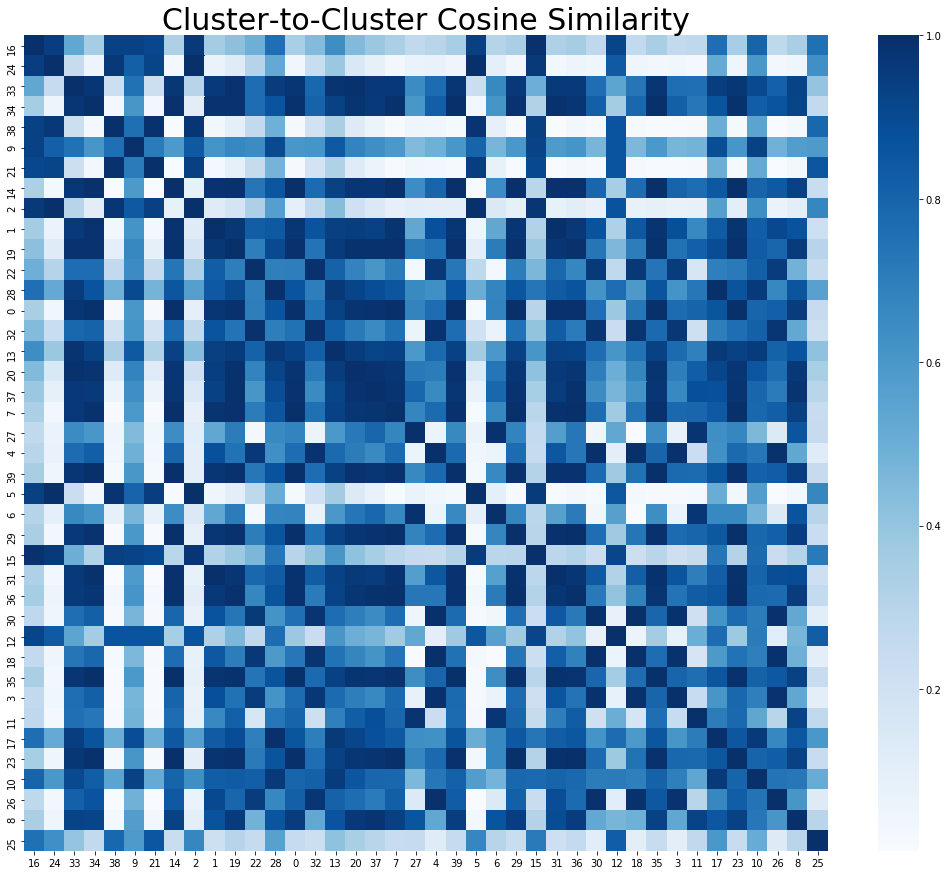

In [297]:
fig = plt.figure(figsize=(18,15))

sns.heatmap(cos_sim,xticklabels=dftest.index, cmap=cm.get_cmap('Blues'),yticklabels=dftest.index)
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)

find most similar clusters

In [290]:
for i,c in enumerate(clusters):
    idx = dftest.index.get_loc(c)
    indices = np.argsort(cos_sim[idx])[::-1][1:]
    top3ind = indices[:3]
    bot3ind = indices[-3:]
    print('Cluster {}: {}'.format(c, categ[i] ))
    top=names[top3ind]
    top_cos = cos_sim[idx][top3ind]
    bot = names[bot3ind]
    bot_cos = cos_sim[idx][bot3ind]
    print('     Most similar clusters:')
    for i in range(3):
        print('     Cluster {0:.0f}:   Cosine Similarity: {1:.2f}'.format(top[i], top_cos[i]))
    
    print('     Least similar clusters:')
    for i in range(3):
        print('     Cluster {0:.0f}:   Cosine Similarity: {1:.2f}'.format(bot[i], bot_cos[i]))
    print('\n')

Cluster 38: Exchanges
     Most similar clusters:
     Cluster 21:   Cosine Similarity: 0.99
     Cluster 5:   Cosine Similarity: 0.98
     Cluster 2:   Cosine Similarity: 0.97
     Least similar clusters:
     Cluster 31:   Cosine Similarity: 0.00
     Cluster 26:   Cosine Similarity: 0.00
     Cluster 14:   Cosine Similarity: 0.00


Cluster 12: Mining
     Most similar clusters:
     Cluster 16:   Cosine Similarity: 0.93
     Cluster 15:   Cosine Similarity: 0.92
     Cluster 2:   Cosine Similarity: 0.87
     Least similar clusters:
     Cluster 3:   Cosine Similarity: 0.08
     Cluster 30:   Cosine Similarity: 0.08
     Cluster 18:   Cosine Similarity: 0.06


Cluster 2: ICO Wallets
     Most similar clusters:
     Cluster 24:   Cosine Similarity: 1.00
     Cluster 5:   Cosine Similarity: 1.00
     Cluster 15:   Cosine Similarity: 0.98
     Least similar clusters:
     Cluster 30:   Cosine Similarity: 0.08
     Cluster 3:   Cosine Similarity: 0.07
     Cluster 26:   Cosine Similarity

array([38, 21,  5,  2, 24, 15, 16, 12, 25,  9, 10, 17, 28, 13, 22, 33, 32,
       20, 19,  6, 37, 27,  4,  1, 36, 34,  8, 23, 18, 39, 11, 30,  0,  3,
       29, 35,  7, 31, 26, 14])

In [180]:
df_radar = df_summary#.loc[list(clusters)]

In [181]:
df_radar['label'] = df_radar.index

In [182]:
df_radar = df_radar.reset_index()

In [183]:
df_radar.set_index('label', inplace=True)

In [184]:
df_radar[df_radar<0] = 0

In [185]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [186]:
#log scale
df_radar = np.log1p(df_radar)+1

label with my name for category
round negative results in summary to zero


In [187]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [188]:
list(df_radar)[1:-1]

['outgoing_txns',
 'incoming_txns',
 'total_eth_sent',
 'avg_eth_sent',
 'total_usd_sent',
 'avg_usd_sent',
 'total_eth_recd',
 'avg_eth_recd',
 'total_usd_recd',
 'avg_usd_recd',
 'active_months',
 'monthly_outgoing_txns',
 'monthly_incoming_txns',
 'monthly_eth_sent',
 'monthly_usd_sent',
 'monthly_eth_recd',
 'monthly_usd_recd',
 'contracts_created',
 'contract_txns_sent',
 'incoming_avg_time_btwn_txns',
 'incoming_std_time_btwn_txns',
 'outgoing_avg_time_btwn_txns',
 'outgoing_std_time_btwn_txns',
 'num_tokens_used',
 'eth_balance']

In [189]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [190]:
df_radar = df_radar[feats]

In [191]:
df_radar = df_radar.loc[list(clusters)]

In [192]:
colors = pickle.load(open( "pk/colors.p", "rb" ) )

In [193]:
d = dict(zip(categ, df_radar.index))

In [194]:
lbls = list(d.keys())
cats = list(d.values())

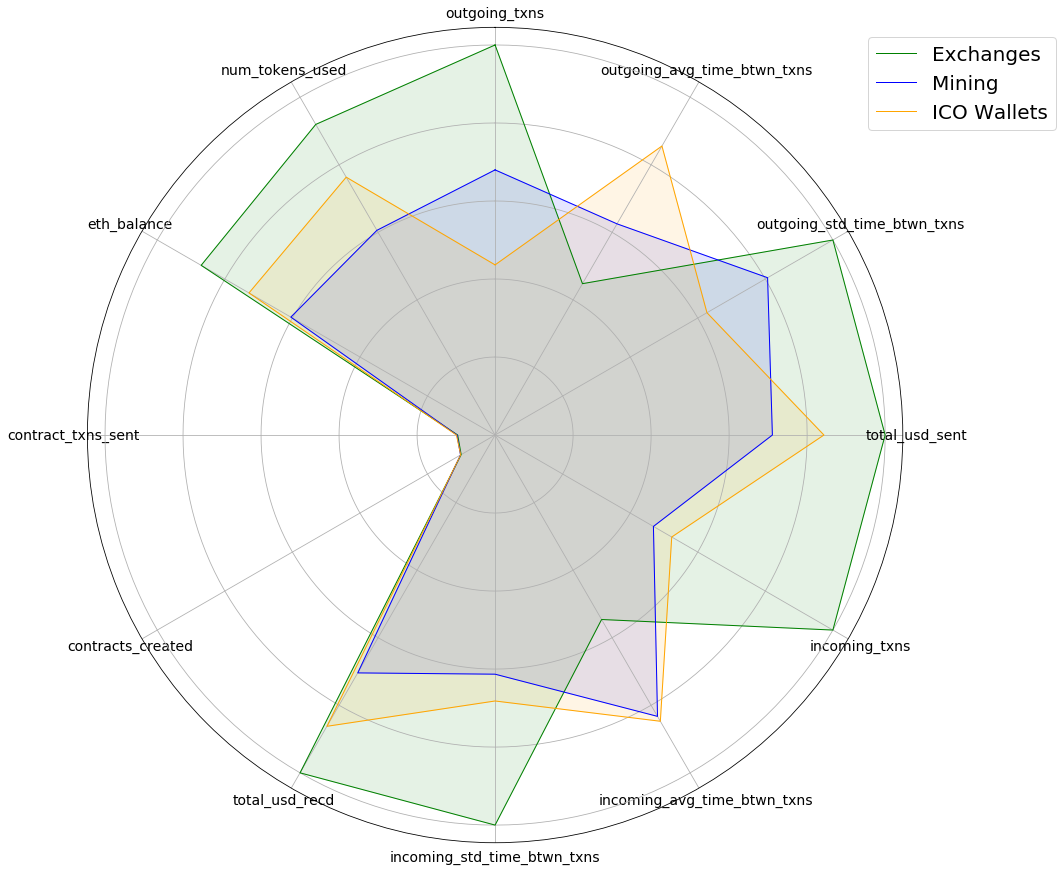

In [195]:

fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(3):
    # Ind1
    lbl = lbls[i]
    values=df_radar.loc[cats[i]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, c=colors[i],linestyle='solid', label=lbl)
    ax.fill(angles, values, c=colors[i], alpha=0.1)
 
 
# Add legend
plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))